In [1]:
import matplotlib.pyplot as plt
import numpy as np

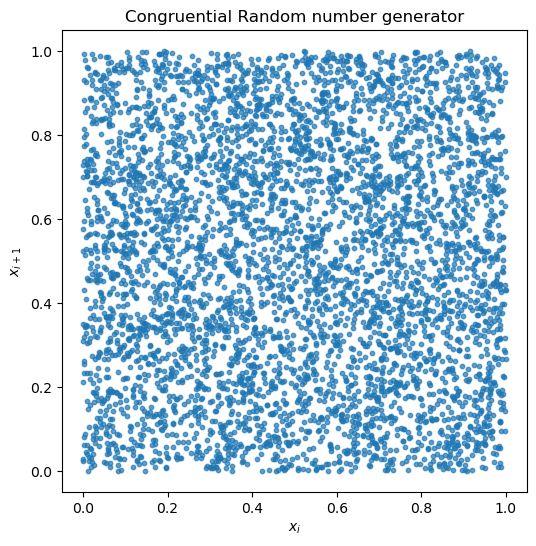

In [20]:
#test congruential generator 
def random_congr(a, c, M, n=5000, x0=42):
    x = x0
    L = []
    for _ in range(n):
        x = (a * x + c) % M
        L.append(x / M)
    return L

a, c, M = 16807, 5, 2**31 - 1
Y = random_congr(a, c, M)
plt.figure(figsize=(6,6))
plt.scatter(Y[:-1], Y[1:], s=10, alpha=0.7)
plt.xlabel('$x_i$')
plt.ylabel('$x_{i+1}$')
plt.title('Congruential Random number generator')
plt.show()

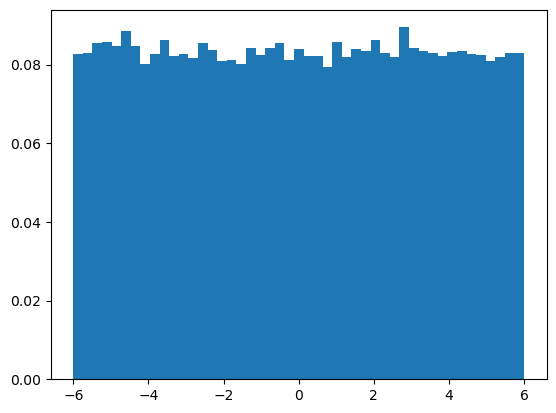

In [26]:
X = np.random.uniform(0, 1, 100000)
Y = 12*X-6

plt.hist(Y, bins='auto', density=True)
plt.show()

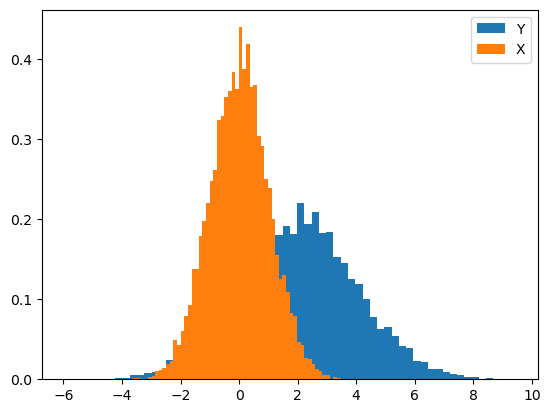

In [31]:
X = np.random.normal(0,1,10000) #Distribution normale centrée réduite
Y = 2+2*X # Distribution normale de moyenne 2 et de variance 2 

plt.hist(Y,bins='auto',density=True, label="Y")
plt.hist(X,bins='auto', density=True, label="X")
plt.legend()
plt.show()

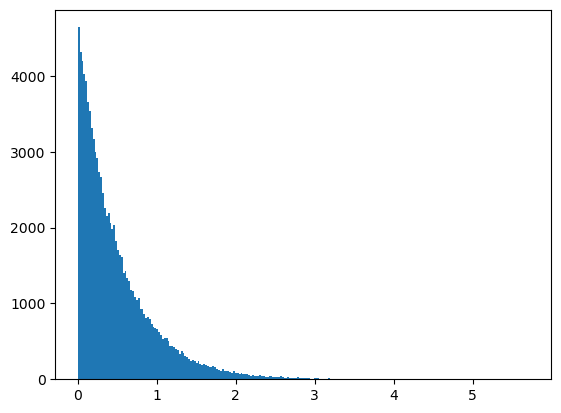

In [36]:
#Simulation of exponential distribution

def sim_expo_distrib(lam,n):
    U = np.random.rand(n)
    Y = -(1/lam)*np.log(U) # U = 1-x avec x suit une loie uniforme sur [0,1]
    return Y

Y = sim_expo_distrib(2,100000)
plt.hist(Y,bins='auto')
plt.show()

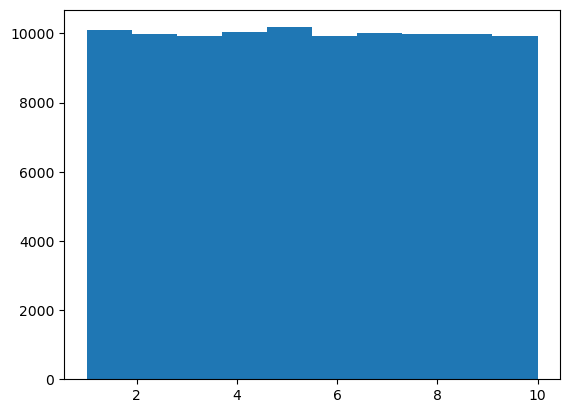

In [44]:
# Exercise : Generate Uniformely distributed random integers in the range 1 to 10 (inclusively) 

U = np.random.rand(100000)

Y = 9*U + 1 

plt.hist(Y)
plt.show()

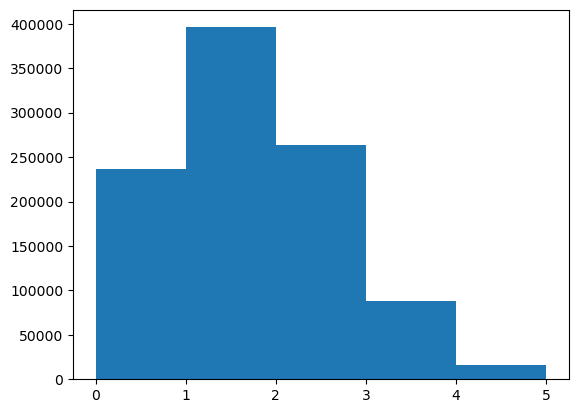

In [ ]:
#Exercise : Simulate a Binomial distribution with parameters N=5 and p=0.25

def s_binomial(s, N, p):
    """
    Simulation de s tirages de loi binomiale (N,p)
    """
    y = np.random.rand(s, N)
    
    x = (y < p).sum(axis=1)
    return x

Y = s_binomial(1000000,5,0.25)
plt.hist(Y, bins='auto')
plt.show()

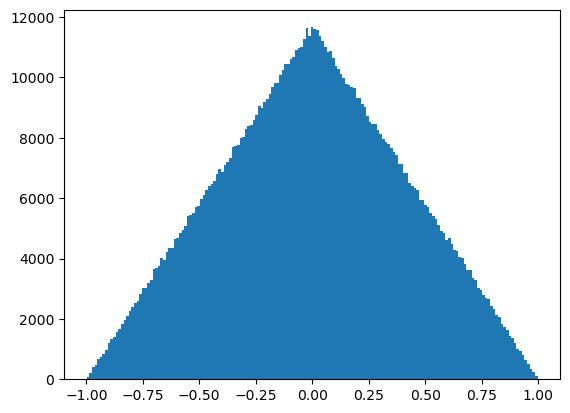

In [49]:
#Acceptance rejection method 

def hat_shaped_density(s,c):
    L = []
    while len(L)< s:
        xi = np.random.uniform(-1,1)
        yi = np.random.uniform(0,c)
        if xi <= 0 :
            if yi <= xi+1 : 
                L.append(xi)
        if xi > 0:
            if yi <= 1 - xi :
                L.append(xi)
    return L

Y = hat_shaped_density(1000000,1)
plt.hist(Y, bins='auto')
plt.show()

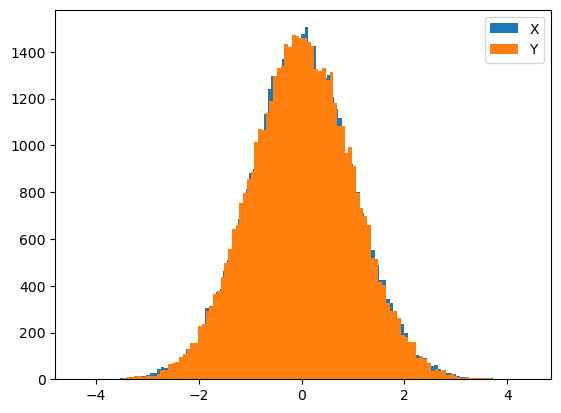

In [55]:
#Algorithme de Box-Muller

U = np.random.uniform(0,1,50000)
V = np.random.uniform(0,1,50000)

X = np.sqrt(-2*np.log(U))*np.cos(2*np.pi*V)
Y = np.sqrt(-2*np.log(U))*np.sin(2*np.pi*V)

plt.hist(X,bins='auto', label="X")
plt.hist(Y,bins="auto", label='Y')
plt.legend()
plt.show()

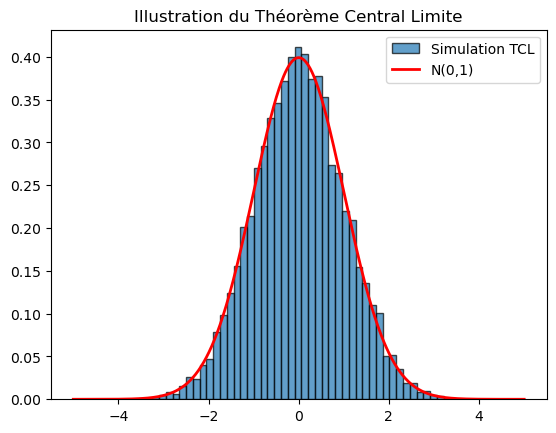

In [57]:
# TCL Simulation


def tcl(n, p, nc):
    """
    Simulation TCL : somme de variables uniformes et comparaison avec N(0,1)
    
    n  : nombre d'échantillons
    p  : nombre de variables uniformes sommées
    nc : nombre de classes de l'histogramme
    """
    # Tirages uniformes sur [0,1]
    X = np.random.rand(n, p)
    
    # Somme des colonnes, centrage et renormalisation
    Z = np.sqrt(12/p) * (X.sum(axis=1) - p/2)
    
    # Histogramme normalisé
    plt.hist(Z, bins=nc, density=True, alpha=0.7, edgecolor="black", label="Simulation TCL")
    
    # Courbe de la densité N(0,1)
    C = np.linspace(-5, 5, 1000)
    plt.plot(C, np.exp(-C**2 / 2) / np.sqrt(2*np.pi), 'r-', lw=2, label="N(0,1)")
    
    plt.title("Illustration du Théorème Central Limite")
    plt.legend()
    plt.show()


tcl(10000, 30, 50)


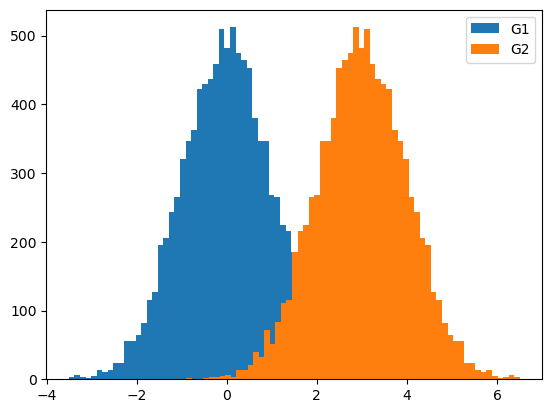

In [60]:
# Simulation of Gaussian Vector 

cov_matrix = [[1,-1], 
              [-1, 1]]

G1, G2 = [], []
for i in range(10000) :
    X1, X2 = np.random.multivariate_normal([0,3], cov_matrix)
    G1 += [X1]
    G2 += [X2]

plt.hist(G1, label="G1", bins="auto")
plt.hist(G2, label="G2", bins="auto")
plt.legend()
plt.show()